In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#from MyUnit import NaturalUnit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.linalg import expm

In [4]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import simpson, trapezoid
from scipy.integrate import solve_ivp

In [5]:
import sys
sys.path.insert(0, '/home/chen/Code/varying_magnetic_field/')
import base as ba

# Solve the coupled ODE

<IPython.core.display.Javascript object>


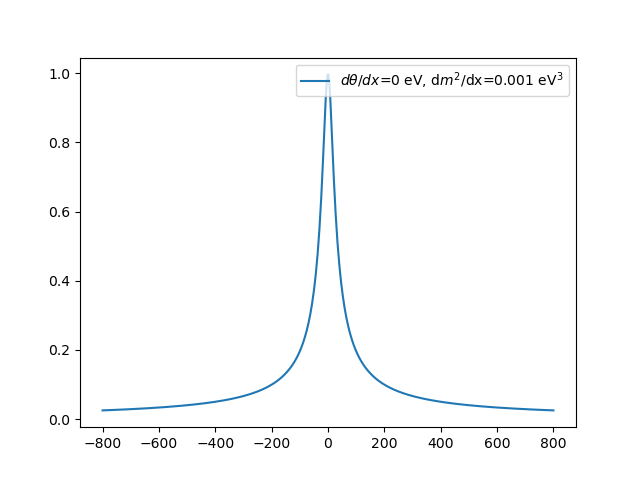

In [6]:
xi=-800
xe=800
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0. #100
ma2_over_om = ma**2/omega
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


x_arr = np.linspace(xi, xe, 500)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)

plt.subplots()
plt.plot(x_arr, sin_alpha_arr, label=r"$d\theta/dx$=%.1g eV, d$m^2$/dx=%.1g eV$^3$"
         %(dthdx,dmg2_over_om_dx))
plt.legend()

In [18]:
xi=-800
xe=800
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0. #100
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx



sol = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


sol_th_0 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])

xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.5
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


sol_th_1 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


<IPython.core.display.Javascript object>


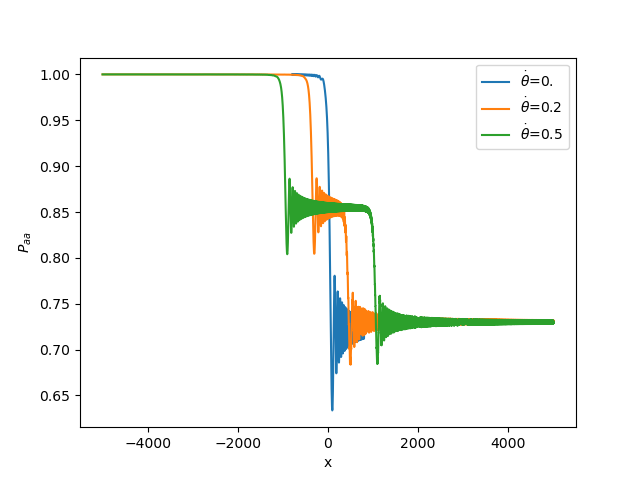

Text(0, 0.5, '$P_{aa}$')

In [19]:
plt.subplots()
plt.plot(sol.t, np.abs(sol.y[2])**2, label=r'$\dot\theta$=0.')
plt.plot(sol_th_0.t, np.abs(sol_th_0.y[2])**2, label=r'$\dot\theta$=0.2')
plt.plot(sol_th_1.t, np.abs(sol_th_1.y[2])**2, label=r'$\dot\theta$=0.5')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{aa}$')
#plt.yscale('log')

<IPython.core.display.Javascript object>


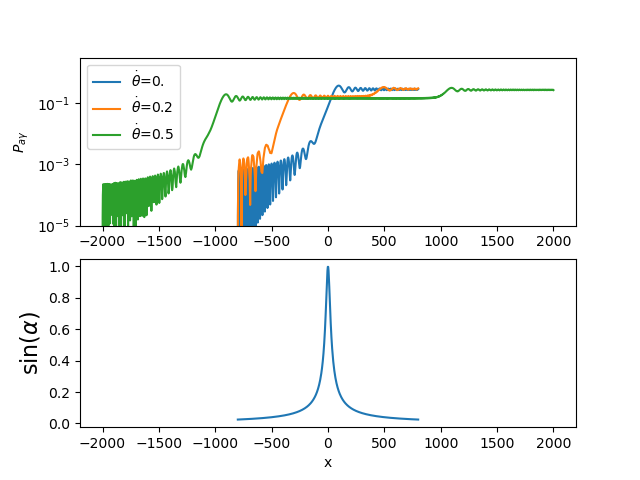

Text(0.5, 0, 'x')

In [9]:
fig = plt.figure()

ax = fig.add_subplot(211)
ax.plot(sol.t, 1-np.abs(sol.y[2])**2, label=r'$\dot\theta$=0.')
ax.plot(sol_th_0.t, 1-np.abs(sol_th_0.y[2])**2, label=r'$\dot\theta$=0.2')
ax.plot(sol_th_1.t, 1-np.abs(sol_th_1.y[2])**2, label=r'$\dot\theta$=0.5')
ax.legend()
ax.set_ylabel(r'$P_{a\gamma}$')
ax.set_ylim(1e-5, 3)
ax.set_yscale('log')

ax2 = fig.add_subplot(212, sharex=ax)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)
ax2.plot(x_arr, sin_alpha_arr)
ax2.set_ylabel(r'$\sin(\alpha)$', size =16)
ax2.set_xlabel('x')



# More complicated $\theta(x)$ form

In [27]:
xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 31.
domain_arr = np.arange(xi, xe, domain_size)
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


<IPython.core.display.Javascript object>


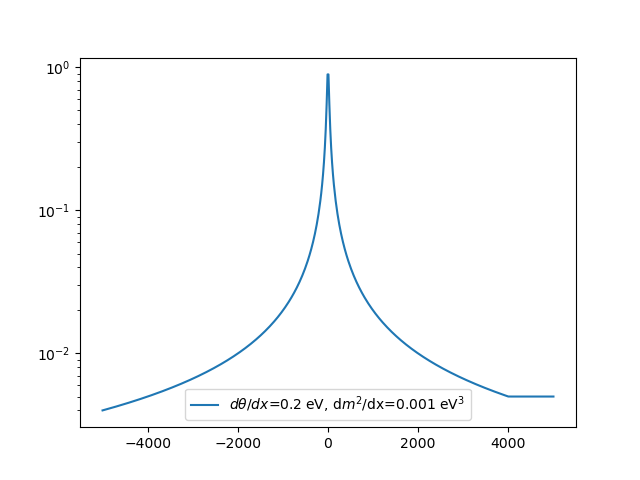

In [28]:
x_arr = np.linspace(xi, xe, 500)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)

plt.subplots()
plt.plot(x_arr, sin_alpha_arr, label=r"$d\theta/dx$=%.1g eV, d$m^2$/dx=%.1g eV$^3$"
         %(dthdx,dmg2_over_om_dx))
plt.yscale('log')
plt.legend()

<IPython.core.display.Javascript object>


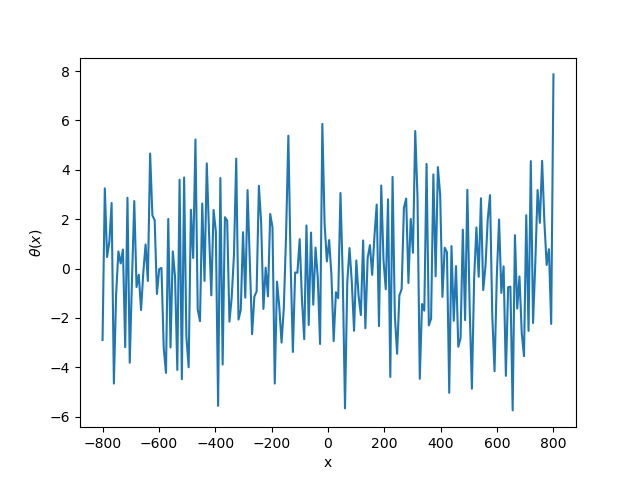

Text(0, 0.5, '$\\theta(x)$')

In [12]:
x_arr = np.linspace(xi, xe, 200)
theta_arr = np.array([theta_fn(x) for x in x_arr])
plt.subplots()
plt.plot(x_arr, theta_arr)
plt.xlabel(r'x')
plt.ylabel(r'$\theta(x)$')

In [21]:
xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/0.5#5.
domain_arr = np.arange(xi, xe, domain_size)
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_0_dom10 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [22]:
xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/0.2 #20.
domain_arr = np.arange(xi, xe, domain_size)
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_0_dom30 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [35]:
xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/0.01 #2.*np.pi/0.1 #20.
domain_arr = np.arange(xi, xe, domain_size)
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_0_dom_large = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
# todo: set a seed for the random number generator so that it can be reproduced.

<IPython.core.display.Javascript object>


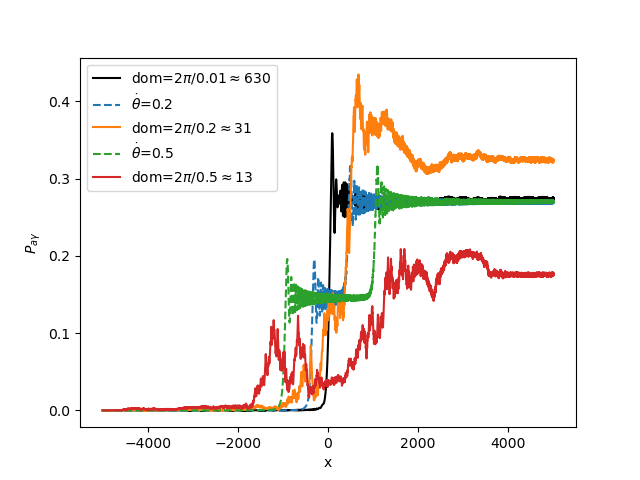

Text(0, 0.5, '$P_{a\\gamma}$')

In [37]:
plt.subplots()

#plt.plot(sol_th_0_dom60.t, 1.-np.abs(sol_th_0_dom60.y[2])**2, 'k', label=r'dom=2$\pi/0.1\approx 60$')
plt.plot(sol_th_0_dom_large.t, 1.-np.abs(sol_th_0_dom_large.y[2])**2, 'k', label=r'dom=2$\pi/0.01\approx 630$')
plt.plot(sol_th_0.t, 1.-np.abs(sol_th_0.y[2])**2, 'C0--', label=r'$\dot\theta$=0.2')
plt.plot(sol_th_0_dom30.t, 1.-np.abs(sol_th_0_dom30.y[2])**2, 'C1', label=r'dom=2$\pi/0.2\approx 31$')
plt.plot(sol_th_1.t, 1.-np.abs(sol_th_1.y[2])**2, 'C2--', label=r'$\dot\theta$=0.5')
plt.plot(sol_th_0_dom10.t, 1.-np.abs(sol_th_0_dom10.y[2])**2, 'C3', label=r'dom=2$\pi/0.5\approx 13$')


plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{a\gamma}$')

# Non-resonance case

<IPython.core.display.Javascript object>


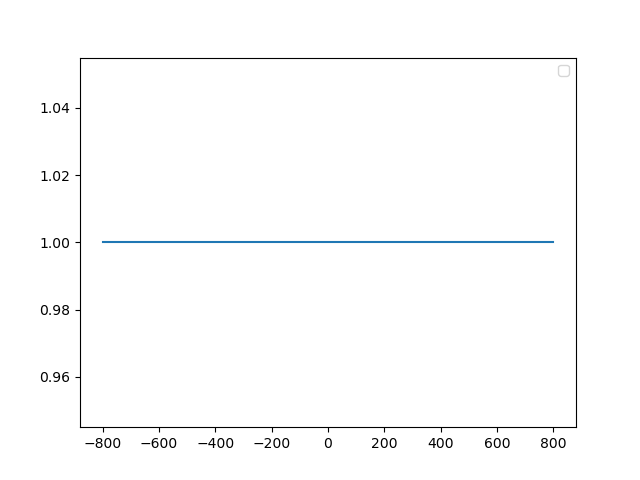

No handles with labels found to put in legend.


In [13]:
# determine the parameter first
xi=-800
xe=800
ma=0.
omega=1
cB=0.01
#dmg2_over_om_dx = 0.001 #0.008
#dthdx=0. #100
#ma2_over_om = ma**2/omega
def mg2_over_om_fn(x): 
    return (x)*0.


x_arr = np.linspace(xi, xe, 500)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)

plt.subplots()
plt.plot(x_arr, sin_alpha_arr)
plt.legend()

In [14]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01
#dmg2_over_om_dx = 0.001 #0.008
#dthdx=0.2
#ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/0.01 #5.
domain_arr = np.arange(xi, xe, domain_size)

# note I'm setting the rnd seed!!! Don't be fooled for the large/small results
np.random.seed(0) 
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    res = 0.*res
    return res


sol_th_nr_dom_inf = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [15]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01
#dmg2_over_om_dx = 0.001 #0.008
#dthdx=0.2
#ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/0.1 #5.
domain_arr = np.arange(xi, xe, domain_size)

# note I'm setting the rnd seed!!! Don't be fooled for the large/small results
#np.random.seed(3) 
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_nr_dom60 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [16]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01
#dmg2_over_om_dx = 0.001 #0.008
#dthdx=0.2
#ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/0.5 #5.
domain_arr = np.arange(xi, xe, domain_size)

# note I'm setting the rnd seed!!! Don't be fooled for the large/small results
np.random.seed(0) 
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_nr_dom13 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


<IPython.core.display.Javascript object>


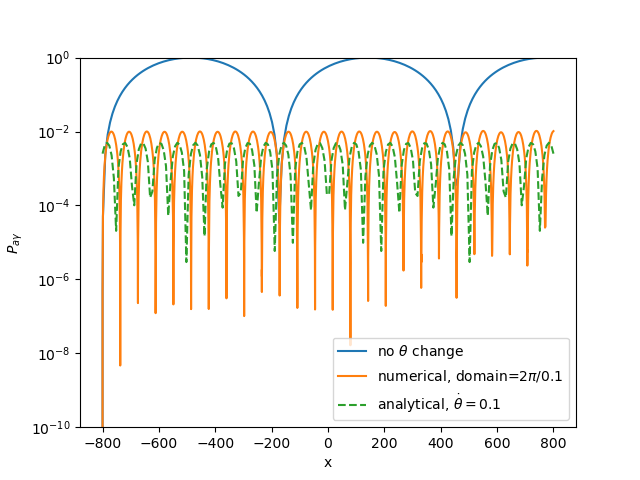

In [18]:
plt.subplots()

#plt.plot(sol_th_0_dom60.t, 1.-np.abs(sol_th_0_dom60.y[2])**2, 'k', label=r'dom=2$\pi/0.1\approx 60$')
# plt.plot(sol_th_0_dom_large.t, 1.-np.abs(sol_th_0_dom_large.y[2])**2, 'k', label=r'dom=2$\pi/0.01\approx 630$')
# plt.plot(sol_th_0.t, 1.-np.abs(sol_th_0.y[2])**2, 'C0--', label=r'$\dot\theta$=0.2')
# plt.plot(sol_th_0_dom30.t, 1.-np.abs(sol_th_0_dom30.y[2])**2, 'C1', label=r'dom=2$\pi/0.2\approx 31$')
# plt.plot(sol_th_1.t, 1.-np.abs(sol_th_1.y[2])**2, 'C2--', label=r'$\dot\theta$=0.5')

#plt.plot(sol_th_nr_dom13.t, 1.-np.abs(sol_th_nr_dom13.y[2])**2)
plt.plot(sol_th_nr_dom_inf.t, 1.-np.abs(sol_th_nr_dom_inf.y[2])**2, label=r'no $\theta$ change')
plt.plot(sol_th_nr_dom60.t, 1.-np.abs(sol_th_nr_dom60.y[2])**2, label=r'numerical, domain=$2\pi/0.1$')

# compare with Seokhoon's analytical results
x_arr = np.linspace(xi, xe, 200)
P_ag_ana = ba.Pag_nr_analytical(x_arr, 0.1, cB)
plt.plot(x_arr, P_ag_ana, '--',label=r'analytical, $\dot\theta=0.1$')


plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{a\gamma}$')
plt.ylim(1e-10, 1)
plt.yscale('log')

In [106]:
# compare with Seokhoon's analytical expression
# DONE